# Primera parte Limpieza de datos.

En esta sección analizaremos el DataFrame de ingresos del Enigh , en los cuales se identificaron 2 objetivos principales:


* Analizar las columnas de ingresos & corregirlas.

* Crear un nuevo DataFrame con el folio de vivienda y su ingreso promedio.

In [ ]:
import pandas as pd

datos_no_procesados = pd.read_csv('/content/conjunto_de_datos_ingresos_enigh_2018_ns.csv')

datos_no_procesados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348487 entries, 0 to 348486
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  348487 non-null  int64  
 1   foliohog  348487 non-null  int64  
 2   numren    348487 non-null  int64  
 3   clave     348487 non-null  object 
 4   mes_1     348487 non-null  object 
 5   mes_2     348487 non-null  object 
 6   mes_3     348487 non-null  object 
 7   mes_4     348487 non-null  object 
 8   mes_5     348487 non-null  object 
 9   mes_6     348487 non-null  object 
 10  ing_1     348487 non-null  int64  
 11  ing_2     348487 non-null  object 
 12  ing_3     348487 non-null  object 
 13  ing_4     348487 non-null  object 
 14  ing_5     348487 non-null  object 
 15  ing_6     348487 non-null  object 
 16  ing_tri   348487 non-null  float64
dtypes: float64(1), int64(4), object(12)
memory usage: 45.2+ MB


Creamos una lista con los ingresos , que mas adelante utilizaremos.

In [ ]:
ing_list = ['ing_2','ing_3','ing_4','ing_5','ing_6']

Convertimos los datos de las columnas de ingresos 2...6 a numericos  , asignamos el argumento `errors='coerse'` para poder convertir los espacios y cadenas a valores Nan.

In [ ]:
# Podriamos haber realizado esta sección con un for.
datos_no_procesados['ing_2'] = pd.to_numeric(datos_no_procesados['ing_2'], errors='coerce')
datos_no_procesados['ing_3'] = pd.to_numeric(datos_no_procesados['ing_3'], errors='coerce')
datos_no_procesados['ing_4'] = pd.to_numeric(datos_no_procesados['ing_4'], errors='coerce')
datos_no_procesados['ing_5'] = pd.to_numeric(datos_no_procesados['ing_5'], errors='coerce')
datos_no_procesados['ing_6'] = pd.to_numeric(datos_no_procesados['ing_6'], errors='coerce')


Verificamos que nuestros datos se hayan convertido correctamente.

In [ ]:
datos_no_procesados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348487 entries, 0 to 348486
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  348487 non-null  int64  
 1   foliohog  348487 non-null  int64  
 2   numren    348487 non-null  int64  
 3   clave     348487 non-null  object 
 4   mes_1     348487 non-null  object 
 5   mes_2     348487 non-null  object 
 6   mes_3     348487 non-null  object 
 7   mes_4     348487 non-null  object 
 8   mes_5     348487 non-null  object 
 9   mes_6     348487 non-null  object 
 10  ing_1     348487 non-null  int64  
 11  ing_2     293393 non-null  float64
 12  ing_3     293393 non-null  float64
 13  ing_4     293393 non-null  float64
 14  ing_5     293393 non-null  float64
 15  ing_6     293393 non-null  float64
 16  ing_tri   348487 non-null  float64
dtypes: float64(6), int64(4), object(7)
memory usage: 45.2+ MB


Vemos cuantos datos nos hacen falta:

In [ ]:
datos_no_procesados.isnull().sum()


folioviv        0
foliohog        0
numren          0
clave           0
mes_1           0
mes_2           0
mes_3           0
mes_4           0
mes_5           0
mes_6           0
ing_1           0
ing_2       55094
ing_3       55094
ing_4       55094
ing_5       55094
ing_6       55094
ing_tri         0
dtype: int64

Realizamos una grafica de nuestros datos para poder visualizar cuantos nos hacen falta.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


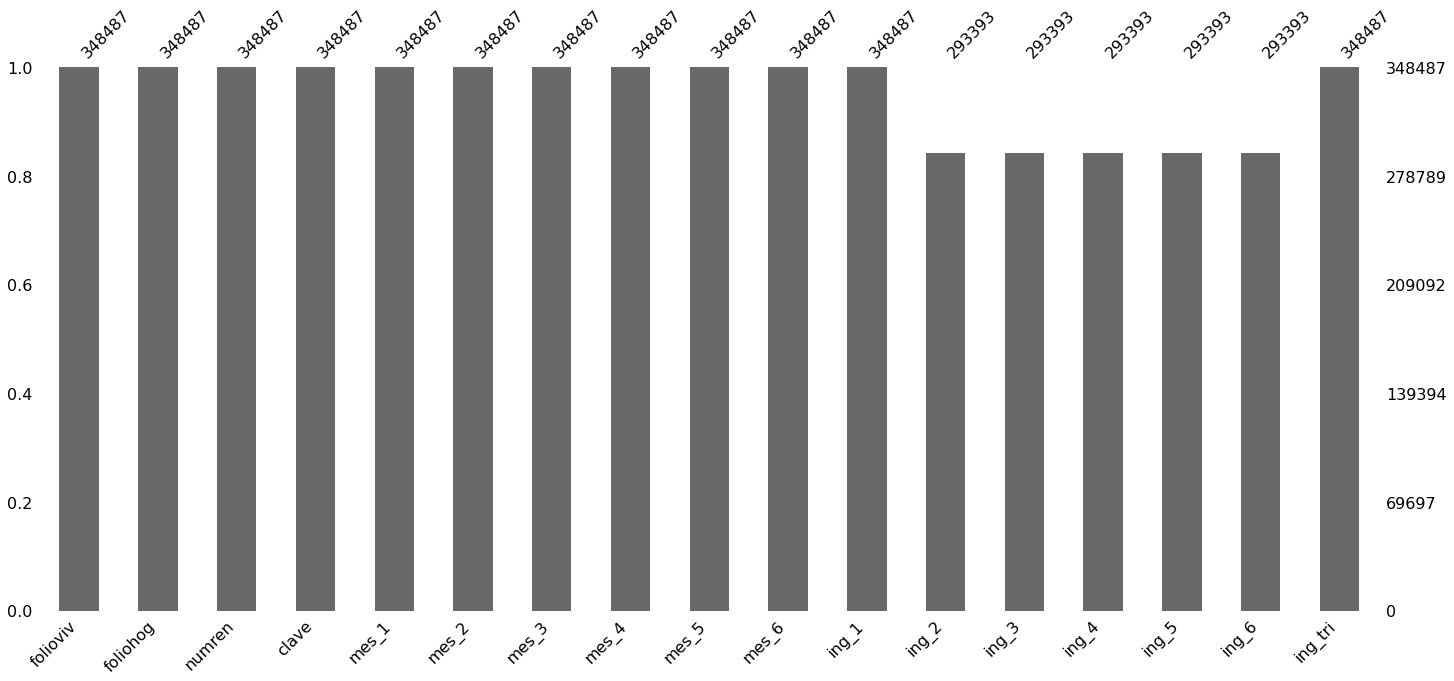

In [ ]:
import missingno as msno

msno.bar(datos_no_procesados)

Procedemos a cortar nuestros datos de las columnas d eingresos para poder trabajar con ellos por separado.

In [ ]:
datos_cortados = datos_no_procesados.drop(ing_list,axis=1)

datos_cortados.head()

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_tri
0,100013601,1,1,P032,9,8,7,6,5,4,3100,9147.54
1,100013601,1,1,P001,9,8,7,6,5,4,10000,29508.19
2,100013601,1,3,P001,9,8,7,6,5,4,8000,23606.55
3,100013601,1,2,P044,9,8,7,6,5,4,0,1622.95
4,100013602,1,2,P063,9,8,7,6,5,4,0,393.44


In [ ]:
datos_cortados.shape

(348487, 12)

In [ ]:
ingresos_df = datos_no_procesados[ing_list]

ingresos_df.shape

(348487, 5)

Calculamos la mediana para imputar los valores faltantes dentro de nuestro dataframe de columnas de ingresos.

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='median')

ingresos_df.iloc[:,:] = mean_imputer.fit_transform(ingresos_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
ingresos_df.shape

(348487, 5)

Volvemos a juntar nuestros dataframes para poder crear el dataframe de interes.

In [ ]:
data_t = pd.concat([datos_cortados,ingresos_df],axis=1)

data_t.shape

(348487, 17)

Verificamos que no exista ningun dato nulo.

In [ ]:
data_t.isnull().sum()

folioviv    0
foliohog    0
numren      0
clave       0
mes_1       0
mes_2       0
mes_3       0
mes_4       0
mes_5       0
mes_6       0
ing_1       0
ing_tri     0
ing_2       0
ing_3       0
ing_4       0
ing_5       0
ing_6       0
dtype: int64

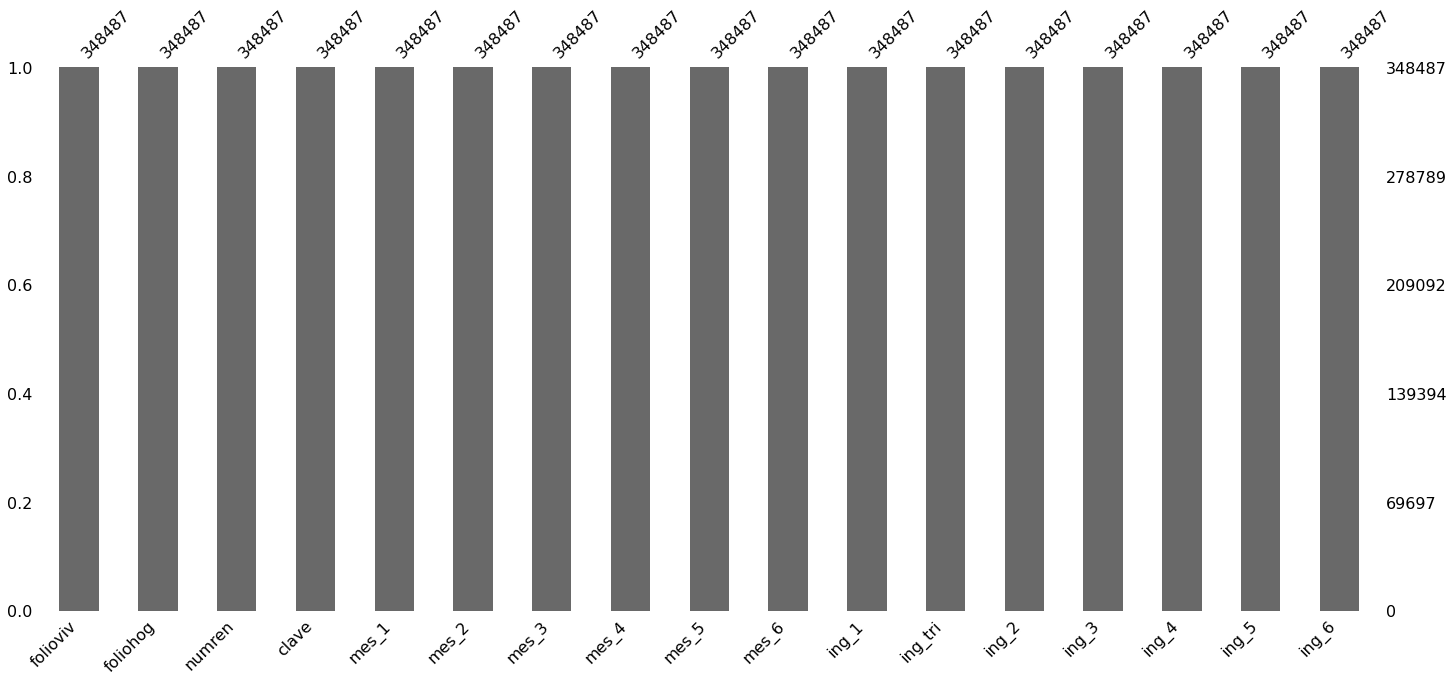

In [ ]:
msno.bar(data_t)

In [ ]:
data_t.head()

,folioviv,foliohog,numren,clave,mes_1,mes_2,mes_3,mes_4,mes_5,mes_6,ing_1,ing_tri,ing_2,ing_3,ing_4,ing_5,ing_6
0,100013601,1,1,P032,9,8,7,6,5,4,3100,9147.54,3100.0,3100.0,3100.0,3100.0,3100.0
1,100013601,1,1,P001,9,8,7,6,5,4,10000,29508.19,10000.0,10000.0,10000.0,10000.0,10000.0
2,100013601,1,3,P001,9,8,7,6,5,4,8000,23606.55,8000.0,8000.0,8000.0,8000.0,8000.0
3,100013601,1,2,P044,9,8,7,6,5,4,0,1622.95,1100.0,0.0,1100.0,0.0,1100.0
4,100013602,1,2,P063,9,8,7,6,5,4,0,393.44,800.0,0.0,0.0,0.0,0.0


In [ ]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348487 entries, 0 to 348486
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  348487 non-null  int64  
 1   foliohog  348487 non-null  int64  
 2   numren    348487 non-null  int64  
 3   clave     348487 non-null  object 
 4   mes_1     348487 non-null  object 
 5   mes_2     348487 non-null  object 
 6   mes_3     348487 non-null  object 
 7   mes_4     348487 non-null  object 
 8   mes_5     348487 non-null  object 
 9   mes_6     348487 non-null  object 
 10  ing_1     348487 non-null  int64  
 11  ing_tri   348487 non-null  float64
 12  ing_2     348487 non-null  float64
 13  ing_3     348487 non-null  float64
 14  ing_4     348487 non-null  float64
 15  ing_5     348487 non-null  float64
 16  ing_6     348487 non-null  float64
dtypes: float64(6), int64(4), object(7)
memory usage: 45.2+ MB


Cambiamos de forma el Df utilizando melt , para poder crear la columna de ingresos.

In [ ]:
ingresos_vivienda_df = pd.melt(data_t, id_vars=['folioviv'], value_vars=['ing_1', 'ing_2', 'ing_3', 'ing_4', 'ing_5','ing_6'])
ingresos_vivienda_df.sample(n=6)

,folioviv,variable,value
1246195,1905852801,ing_4,1500.0
372249,260342504,ing_2,3500.0
1079524,360085219,ing_4,1000.0
516067,1561021510,ing_2,200.0
495516,1361145201,ing_2,2640.0
392702,460204208,ing_2,0.0


Con esta parte del código le pedimos al método  `replace` que los 0 los conviert en `Nan` , de esta manera al momento de calcular la media ignorara los `Nan` por defecto.

In [ ]:
import numpy as np

ingresos_vivienda_df = ingresos_vivienda_df.replace(0,np.NaN)

Agrupamosnnuestro DataFrame por folio vivienda y calculamos la media de los ingresos de cada foliovivienda , sin repetir .

**IMPORTANTE - Existen diferentes maneras de realizar el proceso**

In [ ]:
ingresos_vivienda_df = ingresos_vivienda_df.groupby(['folioviv'])[['value']].mean()
ingresos_vivienda_df = ingresos_vivienda_df.rename(columns={"value": "Ingreso Promedio"})
ingresos_vivienda_df.sample(n =10)

,Ingreso Promedio
folioviv,
2860187311,3068.888889
915046904,1863.750000
502652701,5103.611111
2601335805,2770.833333
2700301204,1547.083333
2060065610,3008.625000
300269206,2288.833333
1560823003,2322.083333
2901373704,1741.666667
